<a href="https://colab.research.google.com/github/threewisemonkeys-as/genrl/blob/master/GenRL_Bandit_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/SforAiDl/genrl.git

Cloning into 'genrl'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 7065 (delta 153), reused 217 (delta 96), pack-reused 6715
Receiving objects: 100% (7065/7065), 7.57 MiB | 5.73 MiB/s, done.
Resolving deltas: 100% (4204/4204), done.


In [ ]:
!pip install -e genrl

Obtaining file:///content/genrl
  Found existing installation: genrl 0.0.1
    Can't uninstall 'genrl'. No files were found to uninstall.
  Running setup.py develop for genrl


In [ ]:
import matplotlib.pyplot as plt
import torch


Started at 25-08-20 18:23:43
Training EpsGreedyMABAgent on BernoulliMAB for 2000 timesteps
timestep                  regret/regret             reward/reward             regret/cumulative_regret  reward/cumulative_reward  regret/regret_moving_avg  reward/reward_moving_avg  
100                       0                         1                         13                        87                        0.13                      0.87                      
200                       0                         1                         27                        173                       0.14                      0.86                      
300                       0                         1                         37                        263                       0.1                       0.9                       
400                       0                         1                         47                        353                       0.1                       0.9                 

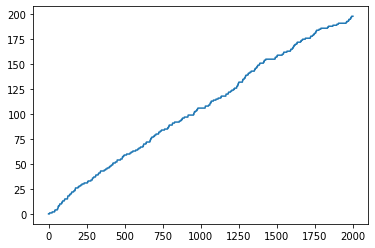

In [ ]:
from genrl.agents import EpsGreedyMABAgent, BernoulliMAB
from genrl.trainers import MABTrainer

bandit = BernoulliMAB(arms=50, context_type="int")
agent = EpsGreedyMABAgent(bandit, eps=0.1)
trainer = MABTrainer(agent, bandit)
results = trainer.train(2000)

plt.plot(results["cumulative_regrets"])


Started at 25-08-20 18:24:09
Training LinearPosteriorAgent on CovertypeDataBandit for 10000 timesteps
timestep                  regret/regret             reward/reward             regret/cumulative_regret  reward/cumulative_reward  regret/regret_moving_avg  reward/reward_moving_avg  
100                       0                         1                         86                        14                        0.86                      0.14                      
200                       1                         0                         168                       32                        0.84                      0.16                      
300                       1                         0                         252                       48                        0.84                      0.16                      
400                       1                         0                         339                       61                        0.8475                    0.1525   

/content/genrl/genrl/agents/bandits/contextual/linpos.py:92: RuntimeWarning: covariance is not positive-semidefinite.
  for i in range(self.n_actions)


600                       1                         0                         509                       91                        0.846                     0.154                     
700                       1                         0                         557                       143                       0.778                     0.222                     
800                       1                         0                         588                       212                       0.672                     0.328                     
900                       0                         1                         634                       266                       0.59                      0.41                      
1000                      0                         1                         678                       322                       0.508                     0.492                     
1100                      0                         1                         715    

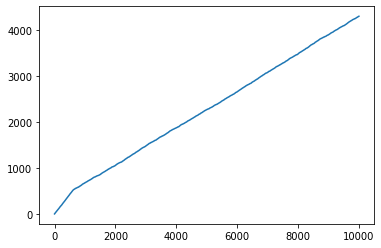

In [ ]:
from genrl.agents import LinearPosteriorAgent
from genrl.trainers import DCBTrainer
from genrl.utils.data_bandits import CovertypeDataBandit

bandit = CovertypeDataBandit(download=True)
agent = LinearPosteriorAgent(bandit)
trainer = DCBTrainer(agent, bandit)
results = trainer.train(10000)

plt.plot(results["cumulative_regrets"])


Started at 25-08-20 18:26:48
Training ReinforcementComparison on BernoulliMAB for 2000 timesteps
timestep                  regret/regret             reward/reward             regret/cumulative_regret  reward/cumulative_reward  regret/regret_moving_avg  reward/reward_moving_avg  
100                       0                         1                         44                        56                        0.44                      0.56                      
200                       0                         1                         78                        122                       0.34                      0.66                      
300                       0                         1                         111                       189                       0.33                      0.67                      
400                       1                         0                         151                       249                       0.4                       0.6           

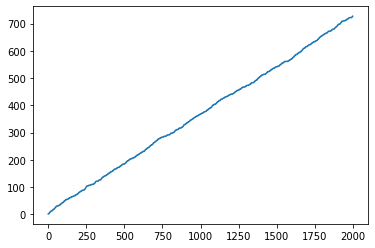

In [ ]:
from genrl.agents import MABAgent
from genrl.agents import EpsGreedyMABAgent, BernoulliMAB

class ReinforcementComparison(MABAgent):
    def __init__(self, bandit, alpha, beta):
        super(ReinforcementComparison, self).__init__(bandit)
        self.alpha = alpha
        self.beta = beta
        self._pi = torch.zeros(self._bandit.arms)
        self._r = torch.zeros(self._bandit.arms)

    def select_action(self, context):
        p = torch.softmax(self._pi, 0)
        a = torch.distributions.Categorical(p).sample()
        return a.item()

    def update_params(self, context, action, reward):
        self._pi[action] += self.beta * (reward - torch.mean(self._r))
        self._r[action] = self._r[action] * (1 - self.alpha) + self._r[action] * self.alpha

bandit = BernoulliMAB(arms=50, context_type="int")
agent = ReinforcementComparison(bandit, 0.3, 0.3)
trainer = MABTrainer(agent, bandit)
results = trainer.train(2000)

plt.plot(results["cumulative_regrets"])


Started at 25-08-20 18:28:18
Training NeuralAgent on BernoulliMAB for 5000 timesteps
timestep                  regret/regret             reward/reward             regret/cumulative_regret  reward/cumulative_reward  regret/regret_moving_avg  reward/reward_moving_avg  
100                       0                         1                         14                        86                        0.14                      0.86                      
200                       0                         1                         15                        185                       0.075                     0.925                     
300                       0                         1                         18                        282                       0.016                     0.984                     
400                       0                         1                         20                        380                       0.02                      0.98                      

Traceback (most recent call last):
  File "/content/genrl/genrl/trainers/bandit.py", line 194, in train
    self.agent.update_params(
AttributeError: 'NeuralAgent' object has no attribute 'update_params'


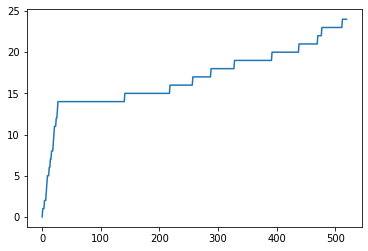

In [ ]:
from genrl.agents import DCBAgent, BernoulliMAB
from genrl.trainers import DCBTrainer
from genrl.agents.bandits.contextual.common import NeuralBanditModel, TransitionDB

class NeuralAgent(DCBAgent):
    def __init__(self, bandit, **kwargs):
        super(NeuralAgent, self).__init__(bandit, **kwargs)
        self.model = (
            NeuralBanditModel(
                context_dim=self.context_dim,
                n_actions=self.n_actions,
                hidden_dims=kwargs.get("hidden_dims", [64]),
                **kwargs
            )
            .to(torch.float)
            .to(self.device)
        )
        self.db = TransitionDB(self.device)
        self.t = 0

    def select_action(self, context):
        self.t += 1
        if self.t < self.n_actions * self.init_pulls:
            return torch.tensor(
                self.t % self.n_actions, device=self.device, dtype=torch.int
            ).view(1)

        results = self.model(context)
        action = torch.argmax(results["pred_rewards"]).to(torch.int).view(1)
        return action

    def update_db(self, context, action, reward):
        self.db.add(context, action, reward)

    def update_param(self, action, batch_size=512, train_epochs=20):
        self.model.train_model(self.db, train_epochs, batch_size)

bandit = BernoulliMAB(arms=10, context_type="tensor")
agent = NeuralAgent(bandit)
trainer = DCBTrainer(agent, bandit)
results = trainer.train(5000)

plt.plot(results["cumulative_regrets"])